## Wat moet er gerapporteerd kunnen worden?
- Oplosgraad incidenten
- Oplosgraad door KIR-team
- Splitsing tussen GEO, AM en Infrax

In [1]:
import pandas as pd

#### Download lijst incidenten vanuit Xtraction: 
- 'Folders' --> 'Shared Folders' --> 'Incident' --> 'Incident Resultaten Support Team (historiek)'
- Kijk manueel na:
    *Indien nodig, wijzig Resolution Group Name naar 'GEO' of 'AM'
    *Indien nodig, voeg de incidenten toe die nog niet zijn afgesloten

In [2]:
# Import historiek incident resultaten en mergen
geo = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (GEO).xlsx"
am = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (AM).xlsx"
incidenten_geo = pd.read_excel(geo, sheet_name='Afgesloten incidenten (lijst)', header=2)
incidenten_am = pd.read_excel(am, sheet_name='Afgesloten incidenten (lijst)', header=2)

incidenten = incidenten_geo.append(incidenten_am, ignore_index=True)
incidenten.dropna(inplace=True, how='all')

In [3]:
# Overbodige kolommen verwijderen
labels = ["CI", "Assign Count", "Customer Resolution Html", "Is VIP?", 
          "Date Last Closed", "Assigned Group", "Assigned To"]
incidenten = incidenten.drop(labels, axis=1)
incidenten.head()

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User
0,327601,Email,Yes,Priority 4,Standalonemap stopped working.,64-bit PC is in orde gebracht en zal in de loo...,EAN4460 Geoview / geolis / geolig / Elont meld...,GCJ099 - Kristof Baele,2017-12-07 16:33:02,2018-12-18 13:00:48,Closed,Appl Netten GEO,QTP864 - Ken Bergers
1,341067,Phone,Yes,Priority 4,Avi Geoviewer laadt zeer traag/slecht in,Ticket gelogd naar Agiv.\nProbleem stelt dat h...,EAN3988 AVI Geoviewer andere incidenten,HQD518 - Rolf Schramme,2018-03-22 15:25:24,2018-04-04 14:46:14,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
2,341110,Email,Yes,Priority 4,PDF elont-i,"Is opgelost.\n\nMet vriendelijke groeten,\n\nF...",EAN1233 Elont andere incidenten,GEA108 - Frederik Van Der Beken,2018-03-23 09:20:15,2018-04-17 14:26:02,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
3,341260,Self Service,Yes,Priority 3,WADMF582 (Rosi uitwisseling met TenForce - inv...,fout in package,EAN0834 EAI melding Operaties & Monitoring,JOR237 - Yoni De Block,2018-03-26 08:24:14,2018-03-28 14:32:16,Closed,Appl Netten GEO,IHZ211 - Philip De Vos
4,341320,Phone,Yes,Priority 4,Lara: Website is niet bereikbaar,probleem zit niet aan kant lara zelf maar aan ...,EAN3182 Agiv Lara andere incidenten,ADR438 - Andy De Smytere,2018-03-26 10:27:32,2018-05-02 09:56:37,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe


In [4]:
incidenten.shape

(1632, 13)

In [5]:
# Convert to datetime
from datetime import datetime
import re

try:
    incidenten["Date Created"] = incidenten["Date Created"].apply(lambda x: datetime.strptime(x, "%d/%m/%Y %H:%M"))
except TypeError:
    print("Striptime already done!")

Striptime already done!


In [6]:
# Filter on dates
incidenten = incidenten[(incidenten["Date Created"] > '2019-03-01') & (incidenten["Date Created"] < '2019-04-01')]

In [7]:
incidenten[incidenten["Resolution Group Name"]=="Appl Netten GEO"]["Date Created"].tail()

1125   2019-03-29 08:37:46
1126   2019-03-29 09:27:00
1127   2019-03-29 09:57:19
1128   2019-03-29 13:43:29
1153   2019-03-01 01:00:00
Name: Date Created, dtype: datetime64[ns]

In [8]:
incidenten.shape

(131, 13)

In [9]:
incidenten["Article"].unique()

array(['EAN2258 GeoView GeoLis andere incidenten',
       'EAN3507 OV WEB andere incidenten',
       'EAN3182 Agiv Lara andere incidenten',
       'EAN4225 O365 Exclusieve cloudtoepassingen andere incidenten',
       'EAN3692 KLIP andere incidenten',
       'EAN4580 Website Fluvius andere incidenten',
       'EAN0834 EAI melding Operaties & Monitoring',
       'EAN1366 Nemesis Middenspanning andere incidenten',
       'EAN1169 GeoView GeoLis Autoplan',
       'EAN4152 OV WEB Deelnetwerk (DNW) incidenten',
       'EAN1113 SAP UniVlam andere incidenten',
       'EAN3664 Website Eandis - GON Stroomonderbrekingen',
       'EAN1158 UNITTG - TTG andere incidenten 1 gebruiker',
       'EAN2662 Gis ControleCentrum niet gebruikt sinds 12 maanden - locked',
       'EAN1234 Elont functionele vragen',
       'EAN0601 Internet Explorer andere incidenten',
       'EAN1631 Website Eandis - Straatlampen andere incidenten',
       'EAN0617 OCE Plotter technische incidenten',
       'INF132 Smallworld O

In [10]:
incidenten[incidenten["Resolution Group Name"]=='Appl Netten GEO']["Resolution User"].value_counts()

QTP864 - Ken Bergers             69
PCK830 - Els  De Roeck           18
GEO                               4
PSZ834 - Thomas Bredenoord        3
GAH048 - Gert Van Dyck            2
GHF281 - Didier Van Belleghem     2
JAD401 - Nick Ceulemans           1
LZM524 - Bernhard Bannink         1
PPC524 - Katrien Verbeek          1
Name: Resolution User, dtype: int64

In [11]:
# Splitsen in AM en GEO incidenten
AM_apps = ["nemesis", "pq", "ov web", "straatlampen", "nemora", "wevab", "iq plus", "ttg", "visa", "encore"]
teamgeo = ['GHG127 - Anneleen Robbe', 'BJF331 - Joris Vanderloock', 'GAH048 - Gert Van Dyck',
           'GHF281 - Didier Van Belleghem', 'JAD401 - Nick Ceulemans',
           'ERN417 - Marieke Algoed', 'PPC524 - Katrien Verbeek',
           'PPC524 - Katrien Verbeek', 'GBE165 - Gunther Daneels',
           'LZM524 - Bernhard Bannink', 'PNF248 - Erwin Munters', 'PSZ834 - Thomas Bredenoord', 'GEO']

for i in incidenten.index:
    article = str(incidenten.loc[i, "Article"]).lower()
    user = str(incidenten.loc[i, "Resolution User"])
    if (any(app in article for app in AM_apps) and (user not in teamgeo)) or user == 'AM':
        incidenten.loc[i, "Resolution Group Name"] = 'AM'
    else:
        incidenten.loc[i, "Resolution Group Name"] = 'GEO'

In [12]:
incidenten[incidenten["Resolution Group Name"]=='AM']["Resolution User"].value_counts()

QTP864 - Ken Bergers              22
AM                                 2
PCK830 - Els  De Roeck             2
HAC226 - Alain Van den Abbeele     1
Name: Resolution User, dtype: int64

In [13]:
# Dit artikel zit automatisch bij GEO. Kijk na of er geen opvallend groot aantal AM gevallen zijn
incidenten[incidenten["Article"]=='EAN0834 EAI melding Operaties & Monitoring']["Summary"].value_counts()

GTDMF585 (Uitwisseling met Synductis - Investeringswerken)                                                  3
GSDMF580 (Upload txt file from SAP to GeoSyn)                                                               1
MF1302 (ophalenHuisnummer in error                                                                          1
PADMF192 (Website stroomonderbrekingen) job in error sinds 04:00                                            1
WADMF582 (Uitwisseling Tenforce) en GDTMF585 (Uitwisseling Synductis) - Investeringswerken jobs in error    1
MF626 (GeoCoordinatenAssetsOphalenViaAssetID) berichten in error                                            1
MF131_NewOrUpdatedSubstationsOrE error                                                                      1
MF153 (oproep aanmaken) berichten niet afgeleverd                                                           1
PADMF192 (Gon website stroomonderbrekingen) in error sinds 03:00                                            1
MF626 (Geo

In [14]:
# Kijk na of alle Infrax collega's zijn toegevoegd in de lijst
infrax_collegas = ["LZM524", "NQB004", "PJS862", "PNF248", "RHC604", "PSZ834", "I"]
incidenten["Resolution User"].unique()

array(['QTP864 - Ken Bergers', 'PCK830 - Els  De Roeck', 'GEO', 'AM',
       'PPC524 - Katrien Verbeek', 'PSZ834 - Thomas Bredenoord',
       'GAH048 - Gert Van Dyck', 'JAD401 - Nick Ceulemans',
       'LZM524 - Bernhard Bannink', 'GHF281 - Didier Van Belleghem', 'I',
       'HAC226 - Alain Van den Abbeele'], dtype=object)

In [15]:
# Toevoegen Infrax Groep
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user in infrax_collegas:
        incidenten.loc[i, "Resolution Group Name"] = "I"

incidenten["Resolution Group Name"].value_counts()

GEO    94
AM     27
I      10
Name: Resolution Group Name, dtype: int64

In [16]:
# Toevoegen KIR kolom
incidenten["KIR"] = 0
KIR = ["QTP864", "PCK830"] 
for i in incidenten.index:
    user = str(incidenten.loc[i, "Resolution User"])[0:6]
    if user in KIR:
        incidenten.loc[i, "KIR"] = 1

incidenten["KIR"].value_counts()

1    107
0     24
Name: KIR, dtype: int64

In [17]:
# Functie om plot aan te maken
import matplotlib.pyplot as plt
from numpy import arange

periode = 'MAR 2019' # Eventueel aanpassen!

plt.rcParams["font.family"] = "serif"

textfont = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'bold',
        'size': 28,
        }

def barplot(series, barwidth, xlabel, ylabel, pngname, plottitle):
    proportie = [int(x/series.sum()*100) for x in series]
    fig = plt.figure(figsize=(24, 10))
    ax = fig.add_subplot(1,1,1)
    bar_positions = arange(len(series.values)) + 1
    ax.bar(bar_positions, series.values, width=barwidth)
    tick_positions = range(1,(len(series.values)+1))
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(series.index)
    ax.set_xlabel(xlabel, fontsize=24)
    ax.set_ylabel(ylabel, fontsize=24)
    ax.tick_params(labelsize=28)
    ax.set_title(plottitle, fontsize=32, pad=45, fontweight='bold') # Titel van plot
    for i, v in enumerate(proportie): # Label propotie bovenop bar
        ax.text(i+1, series[i]+(0.01*max(series.values)), str(v)+"%", horizontalalignment='center', color='black', fontdict=textfont)
    for i, v in enumerate(series): # Label aantal incidenten 
        ax.text(i+1, series[i]+(-0.05*max(series.values)), str(v), horizontalalignment='center', color='black', fontsize=28)
    ax.set_frame_on(b=False)
    today = datetime.today().strftime('%Y%m%d')
    plt.savefig(pngname+"_"+today+".png") # Exporteren plot naar png
    plt.show() 

incident_by_team = incidenten.groupby(by=["Resolution Group Name"]).count()["Incident ID"]

barplot(incident_by_team, 0.5, "Team", "Aantal incidenten", "incidentsPerTeam", "Incidenten "+periode)

<Figure size 2400x1000 with 1 Axes>

In [18]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
#incidenten_ean_KIR = incidenten_ean.groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_ean_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR_GeoAM", "Incidenten GEO+AM-Infrax sep-dec 2018")

In [19]:
#incidenten_eanAM_KIR = incidenten[incidenten["Resolution Group Name"]=="AM"].groupby(by=["KIR"]).count()["Incident ID"]
#barplot(incidenten_eanAM_KIR, 0.5, "Opgelost door KIR=1", "Aantal incidenten", "incidentByKIR", "Incidenten AM sep-dec 2018")

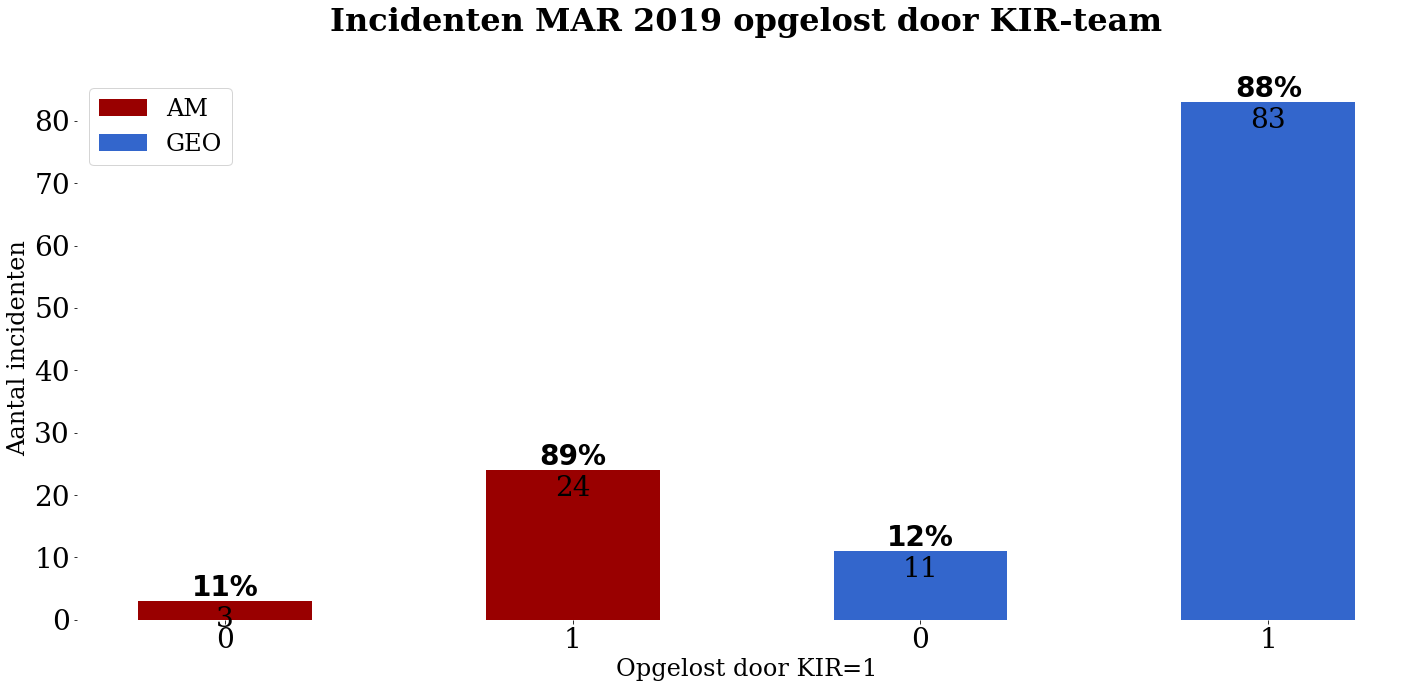

In [20]:
incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
incidenten_ean_GeoAM = incidenten_ean.groupby(by=["Resolution Group Name", "KIR"]).count()["Incident ID"]

# Bereken verhouding incidenten opgelost door KIR per team
proportie = []
for i, amount in incidenten_ean_GeoAM.items():
    if i[0] == "AM":
        som = sum(incidenten_ean_GeoAM["AM"])   
    else:
        som = sum(incidenten_ean_GeoAM["GEO"])
    verhouding = int(round(amount/som*100)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(4) + 1
bar = ax.bar(bar_positions, incidenten_ean_GeoAM.values, width=0.5, color=barcolors)
tick_positions = range(1,5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incidenten_ean_GeoAM.index.get_level_values(1))
ax.set_xlabel("Opgelost door KIR=1", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten "+periode+" opgelost door KIR-team", fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(incidenten_ean_GeoAM):
    ax.text(i+1, v+(0.01*max(incidenten_ean_GeoAM.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
for i, v in enumerate(incidenten_ean_GeoAM): # Label aantal incidenten 
        ax.text(i+1, incidenten_ean_GeoAM[i]+(-0.05*max(incidenten_ean_GeoAM.values)), 
                str(v), horizontalalignment='center', color='black', fontsize=28)
ax.set_frame_on(b=False)
ax.legend(bar[1:3], ["AM", "GEO"], loc=2, prop={'size': 24})
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentsOpgelostDoorKIR_"+today+".png")
plt.show()


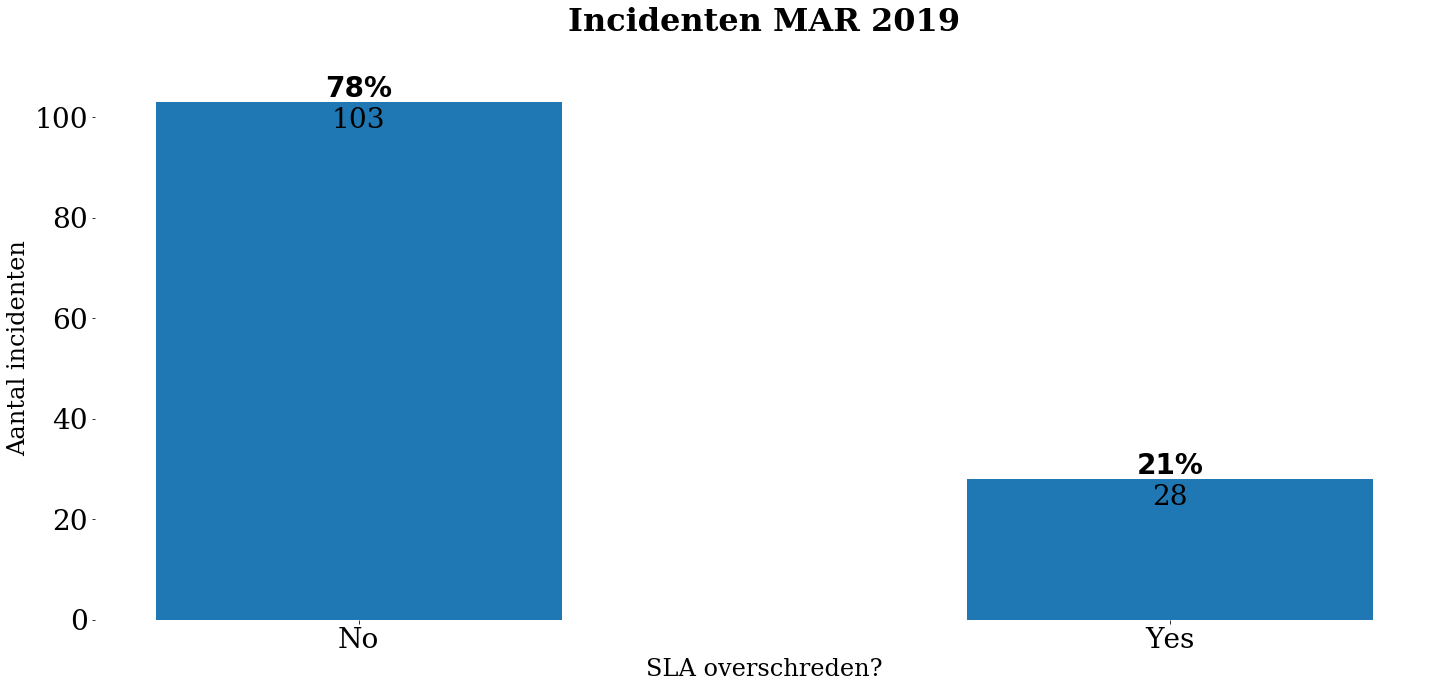

In [21]:
breached_incidenten = incidenten.groupby(by=["Is Breached"]).count()["Incident ID"]
barplot(breached_incidenten, 0.5, "SLA overschreden?", "Aantal incidenten", "incidentsBreached", "Incidenten "+periode)

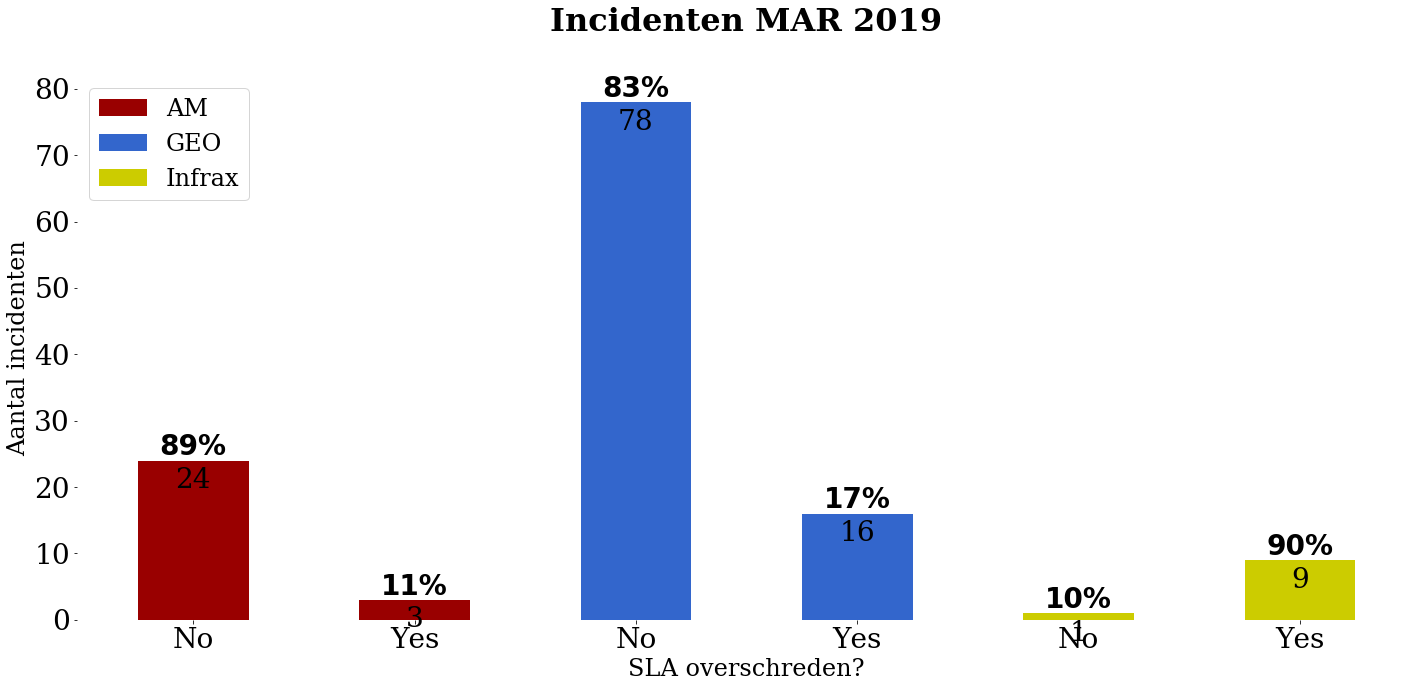

In [22]:
#incidenten_ean = incidenten[(incidenten["Resolution Group Name"]=="AM")|(incidenten["Resolution Group Name"]=="GEO")]
grouped_incidenten = incidenten.groupby(by=["Resolution Group Name", "Is Breached"]).count()["Incident ID"]

# Bereken verhouding breached incidenten per team
proportie = []
for i, amount in grouped_incidenten.items():
    if i[0] == "AM":
        som = sum(grouped_incidenten["AM"])   
    elif i[0] == "GEO":
        som = sum(grouped_incidenten["GEO"])
    else:
        som = sum(grouped_incidenten["I"])
    verhouding = int(round(amount/som*100)) #'round' om correct af te ronden
    proportie.append(verhouding)

# Plot aantal incidenten opgelost door KIR-team
barcolors = ["#990000", "#990000", "#3366cc", "#3366cc", "#cccc00", "#cccc00"]
fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(6) + 1
bar = ax.bar(bar_positions, grouped_incidenten.values, width=0.5, color=barcolors)
tick_positions = range(1,7)
ax.set_xticks(tick_positions)
ax.set_xticklabels(grouped_incidenten.index.get_level_values(1))
ax.set_xlabel("SLA overschreden?", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
ax.set_title("Incidenten "+periode, fontsize=32, pad=45, fontweight='bold') # Titel van plot
for i, v in enumerate(grouped_incidenten):
    ax.text(i+1, v+(0.01*max(grouped_incidenten.values)), str(proportie[i])+"%", 
            horizontalalignment='center', color='black', fontdict=textfont)
for i, v in enumerate(grouped_incidenten): # Label aantal incidenten 
        ax.text(i+1, grouped_incidenten[i]+(-0.05*max(incidenten_ean_GeoAM.values)), 
                str(v), horizontalalignment='center', color='black', fontsize=28)
ax.set_frame_on(b=False)
ax.legend(bar[::2], ["AM", "GEO", "Infrax"], loc=2, prop={'size': 24})
today = datetime.today().strftime('%Y%m%d')
plt.savefig("incidentsBreachedPerTeam"+today+".png")
plt.show()


In [23]:
"""
incident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]
proportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]

barcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]

fig = plt.figure(figsize=(24, 10))
ax = fig.add_subplot(1,1,1)
bar_positions = arange(9) + 1
ax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)
tick_positions = range(1,10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(incident_by_team_complex.index)
ax.set_xlabel("('Team', 'Complexiteit')", fontsize=24)
ax.set_ylabel("Aantal incidenten", fontsize=24)
ax.tick_params(labelsize=28)
for i, v in enumerate(incident_by_team_complex):
    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment='center', color='black', fontdict=textfont)
ax.set_frame_on(b=False)
plt.savefig("incident_by_team_complex.png")
plt.show()
"""

'\nincident_by_team_complex = jul_aug.groupby(by=["Groep", "Complexiteit"]).count()["Incident ID"]\nproportie = [int(x/incident_by_team_complex.sum()*100) for x in incident_by_team_complex]\n\nbarcolors = ["#990000", "#990000", "#990000", "#990000", "#3366cc", "#3366cc", "#3366cc", "#3366cc", "#cccc00"]\n\nfig = plt.figure(figsize=(24, 10))\nax = fig.add_subplot(1,1,1)\nbar_positions = arange(9) + 1\nax.bar(bar_positions, incident_by_team_complex.values, width=0.5, color=barcolors)\ntick_positions = range(1,10)\nax.set_xticks(tick_positions)\nax.set_xticklabels(incident_by_team_complex.index)\nax.set_xlabel("(\'Team\', \'Complexiteit\')", fontsize=24)\nax.set_ylabel("Aantal incidenten", fontsize=24)\nax.tick_params(labelsize=28)\nfor i, v in enumerate(incident_by_team_complex):\n    ax.text(i+1, v+(0.01*max(incident_by_team_complex.values)), str(proportie[i])+"%", horizontalalignment=\'center\', color=\'black\', fontdict=textfont)\nax.set_frame_on(b=False)\nplt.savefig("incident_by_tea

In [24]:
incidenten[(incidenten["Resolution Group Name"]=="AM") & (incidenten["Resolution User"]!="QTP864 - Ken Bergers") & (incidenten["Resolution User"]!="PCK830 - Els  De Roeck")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1018,405839,Self Service,Yes,Priority 3,ABDPERS (Personeelsinfo Batch) job in error,Gilles heeft het data-probleem opgelost en gis...,EAN0834 EAI melding Operaties & Monitoring,AGM177 - Timothy Braeckmans,2019-03-04 08:53:31,2019-03-15 10:56:52,Closed,AM,AM,0
1026,406247,Email,Yes,Priority 3,preventief 302407545,UPDATE NOVPREVENTIEFTEVERVANGENVT ptvt\nSET pt...,EAN1113 SAP UniVlam andere incidenten,EHJ005 - Marc Verschraege,2019-03-05 11:55:30,2019-03-07 09:36:39,Closed,AM,AM,0
1626,413984,Email,No,Priority 4,FW: Foutmelding in Nemesis,dbonly zal uitgevoerd worden op 3/4/2019,EAN1357 Nemesis Gas andere incidenten,HAC226 - Alain Van den Abbeele,2019-03-26 16:20:53,2019-03-27 11:27:11,Closed,AM,HAC226 - Alain Van den Abbeele,0


In [25]:
incidenten[(incidenten["Resolution Group Name"]=="AM") & (incidenten["Is Breached"]=="Yes")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1018,405839,Self Service,Yes,Priority 3,ABDPERS (Personeelsinfo Batch) job in error,Gilles heeft het data-probleem opgelost en gis...,EAN0834 EAI melding Operaties & Monitoring,AGM177 - Timothy Braeckmans,2019-03-04 08:53:31,2019-03-15 10:56:52,Closed,AM,AM,0
1026,406247,Email,Yes,Priority 3,preventief 302407545,UPDATE NOVPREVENTIEFTEVERVANGENVT ptvt\nSET pt...,EAN1113 SAP UniVlam andere incidenten,EHJ005 - Marc Verschraege,2019-03-05 11:55:30,2019-03-07 09:36:39,Closed,AM,AM,0
1088,412171,Email,Yes,Priority 4,"Vilvoorde, Leuvensestraat 20221899",Het betreft een dossier binnen Sibelgas. Hierv...,EAN3507 OV WEB andere incidenten,FFK331 - Kelly Vinckx,2019-03-20 08:10:38,2019-03-28 15:38:32,Closed,AM,QTP864 - Ken Bergers,1


In [26]:
incidenten[(incidenten["Resolution Group Name"]=="GEO") & (incidenten["Resolution User"]!="QTP864 - Ken Bergers") & (incidenten["Resolution User"]!="PCK830 - Els  De Roeck")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1015,405650,Email,Yes,Priority 3,Power BI - Esri ArcGIS Online,"We hebben nogmaals jouw vraag bekeken, maar ku...",EAN4225 O365 Exclusieve cloudtoepassingen ande...,AEL566 - Frederik Huysmans,2019-03-01 16:01:26,2019-03-13 11:54:27,Closed,GEO,GEO,0
1025,406228,Self Service,Yes,Priority 4,GEO - Fout in export GEO extracts,oracle package aangepast zodat DNB Deinze meekomt,EAN2258 GeoView GeoLis andere incidenten,KPK473 - Inge Roekens,2019-03-05 11:22:04,2019-03-11 14:13:54,Closed,GEO,PPC524 - Katrien Verbeek,0
1050,409779,Self Service,Yes,Priority 3,MF1306 (GetCrabDeletedObject) bericht in error,Webservice CRAB_WST is in de avondverwerking i...,EAN0834 EAI melding Operaties & Monitoring,JOR237 - Yoni De Block,2019-03-12 08:12:19,2019-03-13 17:19:53,Closed,GEO,GAH048 - Gert Van Dyck,0
1062,410526,Email,No,Priority 4,Baarle hertog kastelein mof koppelen geolis,Gunther Daneels heeft dit aangepast. Het ging ...,EAN2258 GeoView GeoLis andere incidenten,STX793 - Bert Van Den Heuvel,2019-03-13 19:22:49,2019-03-19 09:58:25,Closed,GEO,GEO,0
1070,411046,Phone,No,Priority 4,SSG - SelfServiceGeo,gebruikers de nodige rollen gegeven,EAN9999 Geen Kennisartikel beschikbaar,FCL015 - Geert Cosyns,2019-03-15 11:10:21,2019-03-20 17:18:11,Closed,GEO,JAD401 - Nick Ceulemans,0
1078,411614,Self Service,Yes,Priority 3,MF1302 (ophalenHuisnummer in error,Controles uitgevoerd; Tijdelijk fenomeen. MF...,EAN0834 EAI melding Operaties & Monitoring,BJG074 - Steven De Loose,2019-03-18 14:36:20,2019-04-04 13:27:43,Closed,GEO,GAH048 - Gert Van Dyck,0
1111,413709,Phone,Yes,Priority 4,Filters in AVI Geoviewer tonen niks meer,De data werd vernieuwd en is terug zichtbaar o...,EAN3988 AVI Geoviewer andere incidenten,FBE048 - Gilbert Taels,2019-03-26 08:46:42,2019-04-05 14:00:59,Closed,GEO,GHF281 - Didier Van Belleghem,0
1115,413994,Phone,No,Priority 4,Foutmelding gipod bij intekenen vanuit Geolis,Opgelost door Stijn Steegen,EAN2870 GIPOD andere incidenten,EAA390 - Wouter Van der Cruyssen,2019-03-26 16:55:00,2019-03-28 09:51:53,Closed,GEO,GEO,0
1116,414057,Self Service,No,Priority 3,GSDMF580 (Upload txt file from SAP to GeoSyn),Opgelost door Stijn Steegen,EAN0834 EAI melding Operaties & Monitoring,AGM177 - Timothy Braeckmans,2019-03-27 08:06:06,2019-03-28 09:51:37,Closed,GEO,GEO,0
1120,414388,Phone,Yes,Priority 3,Spanningsval circuit word niet meer getoont op...,De data werd vernieuwd en is terug zichtbaar o...,EAN3988 AVI Geoviewer andere incidenten,EHG001 - Guido Vos,2019-03-28 08:20:19,2019-04-05 14:01:42,Closed,GEO,GHF281 - Didier Van Belleghem,0


In [27]:
incidenten[(incidenten["Resolution Group Name"]=="GEO") & (incidenten["Is Breached"]=="Yes")]

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User,KIR
1015,405650,Email,Yes,Priority 3,Power BI - Esri ArcGIS Online,"We hebben nogmaals jouw vraag bekeken, maar ku...",EAN4225 O365 Exclusieve cloudtoepassingen ande...,AEL566 - Frederik Huysmans,2019-03-01 16:01:26,2019-03-13 11:54:27,Closed,GEO,GEO,0
1025,406228,Self Service,Yes,Priority 4,GEO - Fout in export GEO extracts,oracle package aangepast zodat DNB Deinze meekomt,EAN2258 GeoView GeoLis andere incidenten,KPK473 - Inge Roekens,2019-03-05 11:22:04,2019-03-11 14:13:54,Closed,GEO,PPC524 - Katrien Verbeek,0
1034,406669,Phone,Yes,Priority 2 - BH,Klim-cicc.be werkt niet,Opgelost door de service desk,EAN0601 Internet Explorer andere incidenten,FFE201 - Svetlana Bubnova,2019-03-06 17:22:23,2019-03-08 08:14:28,Closed,GEO,QTP864 - Ken Bergers,1
1050,409779,Self Service,Yes,Priority 3,MF1306 (GetCrabDeletedObject) bericht in error,Webservice CRAB_WST is in de avondverwerking i...,EAN0834 EAI melding Operaties & Monitoring,JOR237 - Yoni De Block,2019-03-12 08:12:19,2019-03-13 17:19:53,Closed,GEO,GAH048 - Gert Van Dyck,0
1054,409886,Phone,Yes,Priority 4,Logo in Ulysse nog steeds Eandis,Met enige vertraging is de GPO doorgekomen naa...,EAN2480 Ulysse andere incidenten,FIC092 - Kurt Lansens,2019-03-12 10:17:30,2019-03-26 10:43:06,Closed,GEO,QTP864 - Ken Bergers,1
1065,410801,Email,Yes,Priority 3,DESYNC TUSSEN ISU EN GEO (dossier 46154741),In de geo-databank is aansluitingsobject voor ...,EAN0736 SAP UniVlam ISU adreswijziging,GFH006 - Claudia Saerens,2019-03-14 13:41:28,2019-04-05 09:37:34,Closed,GEO,QTP864 - Ken Bergers,1
1078,411614,Self Service,Yes,Priority 3,MF1302 (ophalenHuisnummer in error,Controles uitgevoerd; Tijdelijk fenomeen. MF...,EAN0834 EAI melding Operaties & Monitoring,BJG074 - Steven De Loose,2019-03-18 14:36:20,2019-04-04 13:27:43,Closed,GEO,GAH048 - Gert Van Dyck,0
1090,412271,Phone,Yes,Priority 3,Lara: Het adres werd niet gevonden.,Opgelost,EAN3182 Agiv Lara andere incidenten,FRT131 - Frederiek Legein,2019-03-20 10:35:43,2019-03-22 09:30:55,Closed,GEO,QTP864 - Ken Bergers,1
1111,413709,Phone,Yes,Priority 4,Filters in AVI Geoviewer tonen niks meer,De data werd vernieuwd en is terug zichtbaar o...,EAN3988 AVI Geoviewer andere incidenten,FBE048 - Gilbert Taels,2019-03-26 08:46:42,2019-04-05 14:00:59,Closed,GEO,GHF281 - Didier Van Belleghem,0
1120,414388,Phone,Yes,Priority 3,Spanningsval circuit word niet meer getoont op...,De data werd vernieuwd en is terug zichtbaar o...,EAN3988 AVI Geoviewer andere incidenten,EHG001 - Guido Vos,2019-03-28 08:20:19,2019-04-05 14:01:42,Closed,GEO,GHF281 - Didier Van Belleghem,0


In [28]:
geo = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (GEO).xlsx"
am = "C:\\Users\\SWP679\\Desktop\\Incident resultaten Support Team (AM).xlsx"
incidenten_geo = pd.read_excel(geo, sheet_name='Afgesloten incidenten (lijst)', header=2)
incidenten_am = pd.read_excel(am, sheet_name='Afgesloten incidenten (lijst)', header=2)

incidenten_full = incidenten_geo.append(incidenten_am, ignore_index=True)
incidenten_full.dropna(inplace=True, how='all')

labels = ["CI", "Assign Count", "Customer Resolution Html", "Is VIP?", 
          "Date Last Closed", "Assigned Group", "Assigned To"]
incidenten_full = incidenten_full.drop(labels, axis=1)
incidenten_full.head()

,Incident ID,Incident Source,Is Breached,Response Level,Summary,Technical Resolution,Article,Customer,Date Created,Date Last Resolved,Status,Resolution Group Name,Resolution User
0,327601,Email,Yes,Priority 4,Standalonemap stopped working.,64-bit PC is in orde gebracht en zal in de loo...,EAN4460 Geoview / geolis / geolig / Elont meld...,GCJ099 - Kristof Baele,2017-12-07 16:33:02,2018-12-18 13:00:48,Closed,Appl Netten GEO,QTP864 - Ken Bergers
1,341067,Phone,Yes,Priority 4,Avi Geoviewer laadt zeer traag/slecht in,Ticket gelogd naar Agiv.\nProbleem stelt dat h...,EAN3988 AVI Geoviewer andere incidenten,HQD518 - Rolf Schramme,2018-03-22 15:25:24,2018-04-04 14:46:14,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
2,341110,Email,Yes,Priority 4,PDF elont-i,"Is opgelost.\n\nMet vriendelijke groeten,\n\nF...",EAN1233 Elont andere incidenten,GEA108 - Frederik Van Der Beken,2018-03-23 09:20:15,2018-04-17 14:26:02,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe
3,341260,Self Service,Yes,Priority 3,WADMF582 (Rosi uitwisseling met TenForce - inv...,fout in package,EAN0834 EAI melding Operaties & Monitoring,JOR237 - Yoni De Block,2018-03-26 08:24:14,2018-03-28 14:32:16,Closed,Appl Netten GEO,IHZ211 - Philip De Vos
4,341320,Phone,Yes,Priority 4,Lara: Website is niet bereikbaar,probleem zit niet aan kant lara zelf maar aan ...,EAN3182 Agiv Lara andere incidenten,ADR438 - Andy De Smytere,2018-03-26 10:27:32,2018-05-02 09:56:37,Closed,Appl Netten GEO,GHG127 - Anneleen Robbe


In [29]:
incidenten_cut = incidenten_full[(incidenten_full["Date Created"] > '2018-09-01') & (incidenten_full["Date Created"] < '2019-03-01')]
incidentenByArticle = incidenten_cut.groupby(by=["Article"]).count()["Incident ID"]
incidentenByArticle = incidentenByArticle[incidentenByArticle>=1] # Waarvoor meer dan 5 incidenten

In [30]:
df_incidentenByArticle = pd.DataFrame(incidentenByArticle)
df_incidentenByArticle.rename(columns={'Incident ID': "Count"}, inplace=True) 
df_incidentenByArticle.shape

(106, 1)

In [31]:
df_incidentenByArticle["Ratio"] = df_incidentenByArticle["Count"]/df_incidentenByArticle["Count"].sum()*100
df_incidentenByArticle["Ratio"] = df_incidentenByArticle["Ratio"].apply(lambda x: round(x, 1))
df_incidentenByArticle.to_excel("incidentenPerArtikel.xlsx")

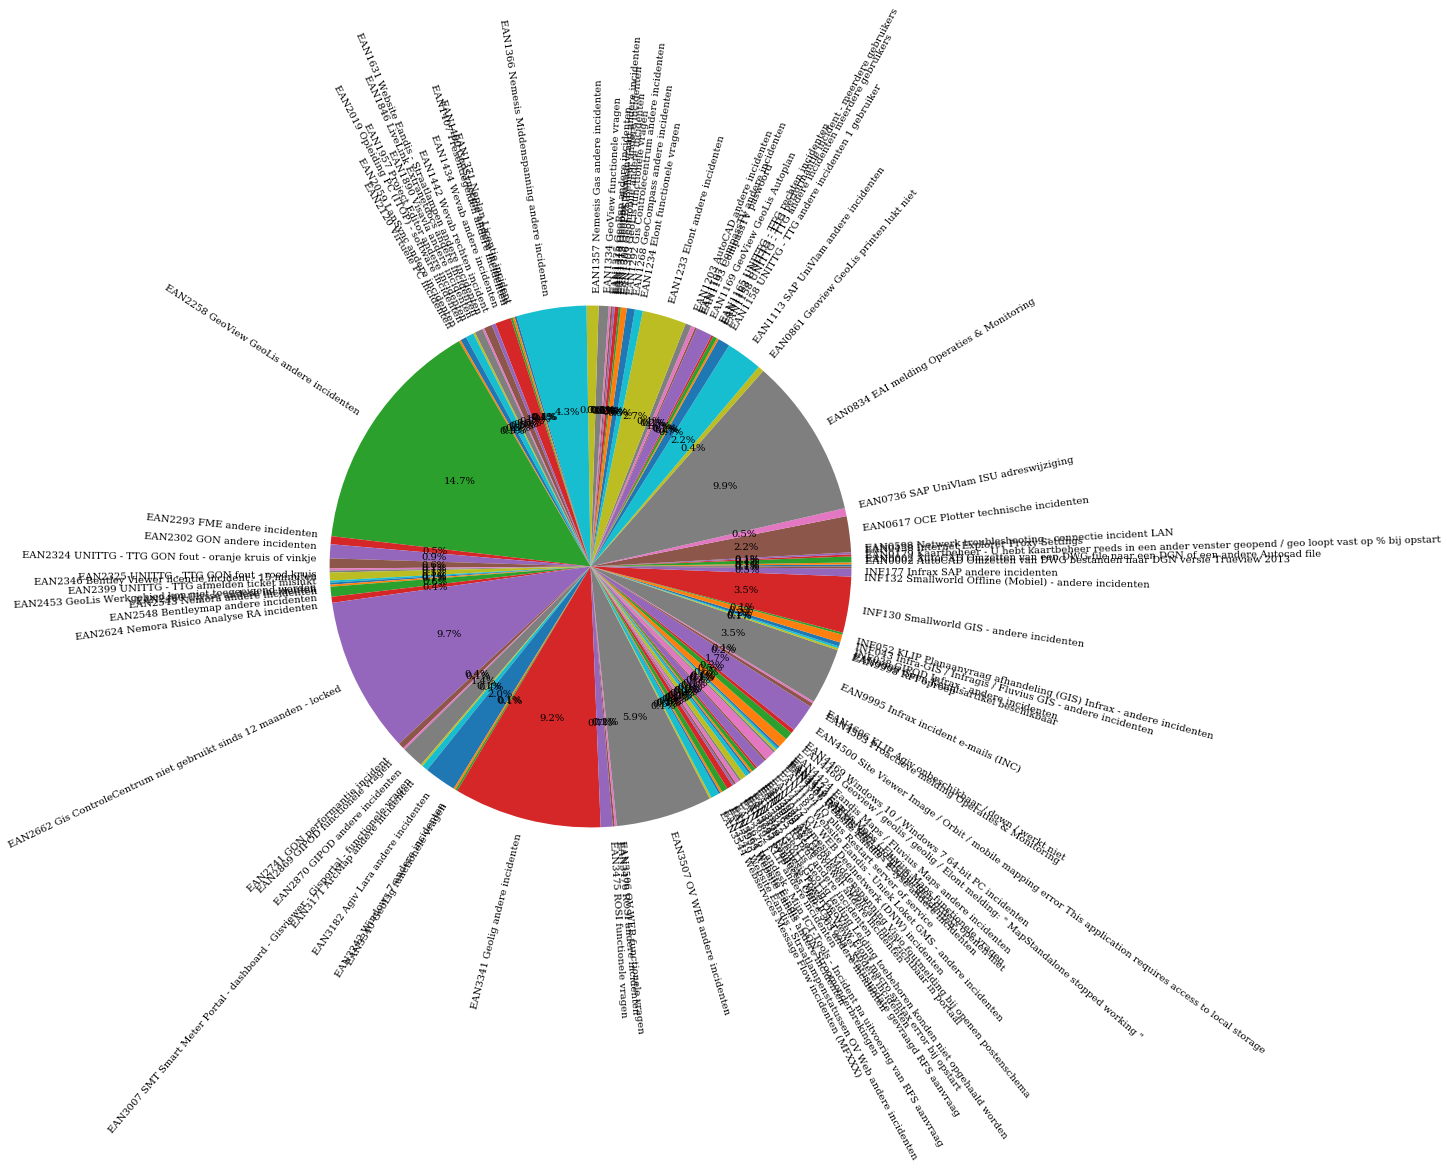

In [32]:
plt.pie(df_incidentenByArticle["Count"], labels=df_incidentenByArticle.index, autopct='%.1f%%', labeldistance=1.05, radius=3,
       rotatelabels=True)
plt.show()